## learning-AI101 : bream and smelt classification 
- 혼자 공부하는 머신러닝과 딥러닝 : 처음 ~ 111p
- 2024.07.01. ~ 2024.07.07
-----

#### phase 1

- train set과 test set을 분리하지 않고 모델을 학습 및 평가 -> 그로 인하여 정확도가 1이 되어버린 상태
- 전처리 과정을 거치지 않음 (nan이 없어보임)
- n_neighbors을 조정

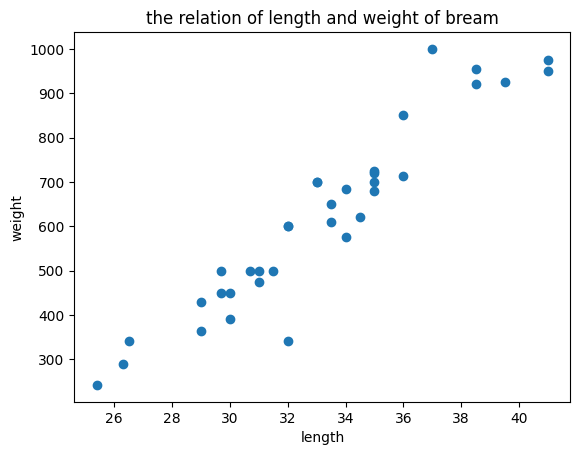

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt

plt.title('the relation of length and weight of bream')
plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show() # linear

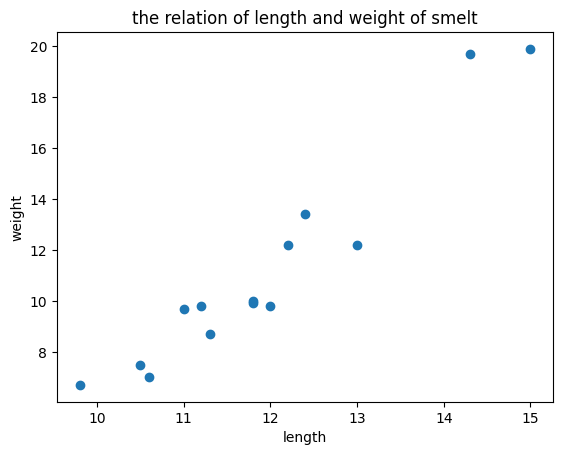

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.title('the relation of length and weight of smelt')
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show() # linear

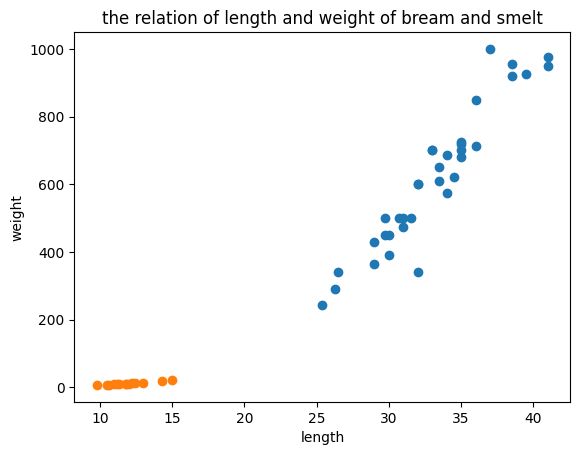

In [3]:
# 위 두개의 산포도를 합친다 (scatter을 연이어서 사용)

plt.title('the relation of length and weight of bream and smelt')
plt.scatter (bream_length, bream_weight)
plt.scatter (smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [19]:
# scikit-learn의 입력 데이터는 2차원 리스트 혹은 2차원 ndarray를 사용한다
# 이때 각각의 입력 데이터의 tuple을 샘플이라고 한다

length = bream_length + smelt_length # for fit -> classification
weight = bream_weight + smelt_weight # for fit -> classification

# KNN 모델에 대입할 데이터를 준비

fish_input = [[length[i], weight[i]] for i in range(len(length))] # map 함수 대신 인덱싱을 사용
train_input = fish_input[:]
print (train_input[:10], len(train_input))

fish_target = [0] * len(bream_length) + [1] * len(smelt_length) # 이진 분류
train_target = fish_target[:]
# 0 == bream / 1 == smelt

print (train_target[:10], len(train_target))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0]] 49
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 49


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # KNN 모델

In [21]:
# train_data를 이용하여 모델을 학습시킨다

knn.fit (train_input, train_target)

KNeighborsClassifier()

In [22]:
# evalutaion (평가)

knn.score(train_input, train_target) 

# 여기서 오류가 생긴다. 정확도가 1
# 학습하였던 train set을 가지고 다시 모델을 평가하면 정답을 다 알려주고 문제를 풀으라고 하는 상황인 것 

1.0

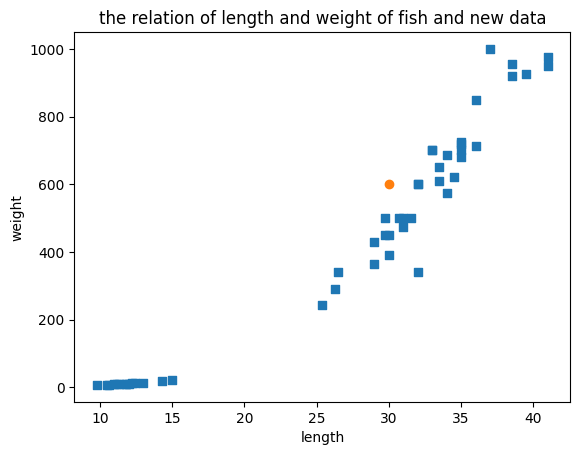

In [23]:
# new data -> predict

new_data = [30, 600]

plt.title('the relation of length and weight of fish and new data')
plt.scatter (length, weight, marker='s')
plt.scatter (new_data[0], new_data[1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 오랜지색 원이 새로운 데이터

In [24]:
# 예측 단계
# CAUTION : scikit-learn의 입력 데이터는 항상 2차원 데이터여야 함

knn.predict([new_data]) 

array([0])

In [25]:
# n_neighbors parameter를 조정하여 참고하는 주변 데이터의 갯수를 수정한다

knn = KNeighborsClassifier()
knn.fit(train_input, train_target)

for i in range(5, 50) :
    knn.n_neightbors = i
    score = knn.score(train_input, train_target)
    
    print (f'{i} : ', score)

5 :  1.0
6 :  1.0
7 :  1.0
8 :  1.0
9 :  1.0
10 :  1.0
11 :  1.0
12 :  1.0
13 :  1.0
14 :  1.0
15 :  1.0
16 :  1.0
17 :  1.0
18 :  1.0
19 :  1.0
20 :  1.0
21 :  1.0
22 :  1.0
23 :  1.0
24 :  1.0
25 :  1.0
26 :  1.0
27 :  1.0
28 :  1.0
29 :  1.0
30 :  1.0
31 :  1.0
32 :  1.0
33 :  1.0
34 :  1.0
35 :  1.0
36 :  1.0
37 :  1.0
38 :  1.0
39 :  1.0
40 :  1.0
41 :  1.0
42 :  1.0
43 :  1.0
44 :  1.0
45 :  1.0
46 :  1.0
47 :  1.0
48 :  1.0
49 :  1.0


-----

#### phase 2
- train set, test set을 배열 인덱싱 이용하여 나눔 (대략 8:2)
- 샘플링 편향을 확인한 후, index 배열을 arange로 만든 후 shuffle을 통하여 데이터를 섞음

In [27]:
# train set, test set 만들기 (리스트 슬라이싱 이용해서)
# 위에서 모든 데이터를 train_input, train_target으로 놓았기 때문에 아래와 같이 작성

train_input = fish_input[:35].copy()
train_target = fish_target[:35].copy()

test_input = fish_input[35:].copy()
test_target = fish_target[35:].copy()

print (train_input[0], train_target[0])

[25.4, 242.0] 0


In [28]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier() # modelling
knn.fit(train_input, train_target) # fit
knn.score(test_input, test_target)

# accuracy 0이 나오는 이유 : 샘플링 편향
# train set의 target은 지금 0만 들어있고, test set의 target은 1만 들어있다. (특정 종류의 샘플이 치우쳐져 있다)
# 샘플링 편향을 방지하기 위하여 데이터를 섞거나 랜덤한 위치에서 뽑아야 한다

0.0

In [35]:
# numpy의 np.array와 arange를 이용하여 배열로 형변환 및 index 배열 만들기
# index 배열 만들어서 섞기 (샘플링 편향 막기 위하여)

fish_input = np.array (fish_input)
fish_target = np.array (fish_target)
index = np.arange(0, len(fish_input)) # 전체 샘플 수만큼 인덱스 만듦

np.random.shuffle(index) # 랜덤으로 섞기
print (index)

[ 9  3 30 32  7 48 36 31 18 10  8 43 45 26 20 29  4 11 24 27 41 14  0 34
 40 28 17 12 22 38 39 42 19 47 23 16  5 35 33 13  1 37 46  6 25 21 44 15
  2]


In [39]:
# index 배열을 이용하여 각 index에 해당되는 train set, test set 만들기
# 배열 인덱싱 (논리 인덱싱) 사용하기

print (fish_input[[1, 3]])

train_input = fish_input[index[:35]]
train_target = fish_target[index[:35]]

test_input = fish_input[index[35:]]
test_target = fish_target[index[35:]]

print (train_input, train_target) # 잘 되었음

[[ 26.3 290. ]
 [ 29.  363. ]]
[[  30.7  500. ]
 [  29.   363. ]
 [  38.5  920. ]
 [  39.5  925. ]
 [  30.   390. ]
 [  15.    19.9]
 [  10.5    7.5]
 [  38.5  955. ]
 [  33.5  610. ]
 [  31.   475. ]
 [  30.   450. ]
 [  12.     9.8]
 [  12.4   13.4]
 [  35.   720. ]
 [  34.   575. ]
 [  37.  1000. ]
 [  29.   430. ]
 [  31.   500. ]
 [  35.   700. ]
 [  36.   714. ]
 [  11.8   10. ]
 [  32.   600. ]
 [  25.4  242. ]
 [  41.   950. ]
 [  11.3    8.7]
 [  36.   850. ]
 [  33.   700. ]
 [  31.5  500. ]
 [  34.5  620. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.8    9.9]
 [  33.5  650. ]
 [  14.3   19.7]
 [  35.   680. ]] [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0]


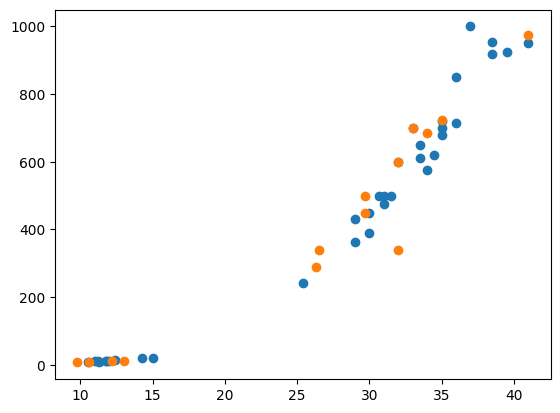

In [40]:
# scatter 그려서 잘 섞였는지 확인

plt.scatter(train_input[:, 0], train_input[:, 1]) # train set의 0번째 열, 1번째 열을 이용하여 산포도
plt.scatter(test_input[:, 0], test_input[:, 1]) # train set의 0번째 열, 1번째 열을 이용하여 산포도
plt.show()

In [42]:
# fit, score, predict

knn.fit(train_input, train_target)
knn.score(test_input, test_target)

predict_set = np.array([[10, 180], [20, 200]]) # 2차원 ndarray

knn.predict(predict_set)

array([1, 1])

----

#### phase 3

- 리스트 슬라이싱을 이용하지 않고 column_stack, concatenate, train_test_split 이용하여 train set, test set을 알맞게 분리
- x와 y의 scale이 달라서 학습이 제대로 이루어지지 않은 상황을 고려하여 normalization을 진행 (여기서는 z-score 활용)

In [44]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# np.column_stack을 이용하여 두 1차원 리스트를 각자 대응하는 원소끼리 2차원 리스트로 변환 (입력 데이터는 튜플로)
# 예를 들어서, [1, 2, 3], [4, 5, 6]이면 [[1, 4], [2, 5], [3, 6]]

fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [46]:
# concatenate와 ones, zeros를 이용하여 target 생성 (입력 데이터는 튜플로)

fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 1 : 도미 / 0 : 빙어
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# index를 shuffle하여 랜덤한 set을 생성하지 않고, train_test_split을 이용하여 생성

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, 
                                                                      random_state=42, stratify=fish_target)
# random_state : np.random.seed와 동일한 것 (의사 난수)
# stratify : 샘플링 편향을 막기 위하여, 타깃 데이터의 클래스 비율에 맞게 데이터를 고르게 분리

In [50]:
# 모델링 -> fit -> score

knn = KNeighborsClassifier()
knn.fit(train_input, train_target)
knn.score(test_input, test_target) # 1.0

1.0

In [51]:
# prediction

knn.predict([[25, 150]]) # 25, 150은 사실 도미 (1)인데 왜 0으로 예측하는 것인가?

array([0.])

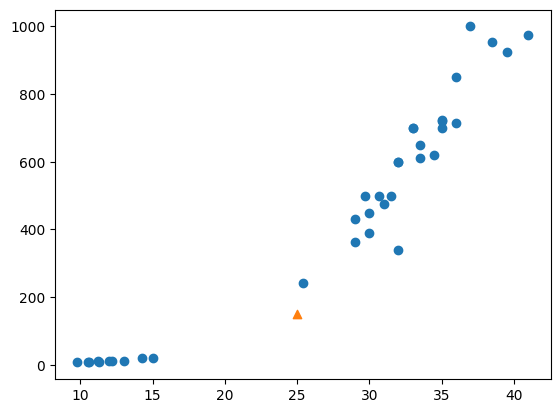

In [53]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # 위의 값
plt.show()

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


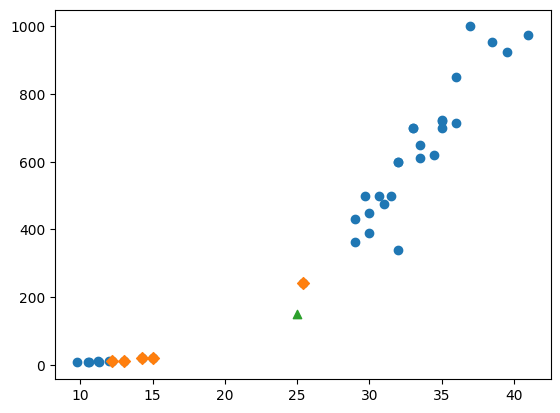

In [56]:
# n_neighbors들이 어디 있는지, 거리는 어떻게 되는지, 샘플 데이터의 인덱스는 어떻게 되는지 -> kneighbors
# kneighbors를 이용하여 prediction 데이터와 가까운 데이터를 확인 후에 시각화

distances, indexes = knn.kneighbors([[25, 150]]) # 25, 150과 가까운 5개의 이웃 (기본값)들의 거리와 인덱스
print (distances, indexes)

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.scatter(25, 150, marker='^') # 위의 값

plt.show()

# 아래 확인해보니 당연히 1로 예측해야 하는데 왜 1이 아니라 0이 나올까
# x와 y의 scale이 다른 상태에서 거리 기반의 모델을 사용하였기 때문

In [58]:
# z-score normaliztion을 진행하기 위해 np.std로 표준편차를 구한다
# pandas의 std와 다른 점 : 베셀 보정

mean = np.mean (train_input, axis = 0) # 열 중심으로 평균 구하기
std = np.std (train_input, axis = 0) # 열 중심으로 표준편차 구하기
mean, std

# 각각 차례대로 length의 평균, weight의 평균, length의 표준편차, weight의 표준편차

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [60]:
# z-score normalization을 적용한 train set과 test set 만들기
# CAUTION : test set, prediction data를 만들 때에도 train_input으로 만든 mean과 std를 이용할 것

# broadcasting
train_scaled = (train_input - mean) / std # z-score
test_scaled = (test_input - mean) / std # mean, std는 train_input에서 추출된 것 (그대로 사용해야 scale이 맞다)

In [61]:
# normalization을 진행한 데이터를 이용하여 모델링, fit, score

knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

1.0

[1.]


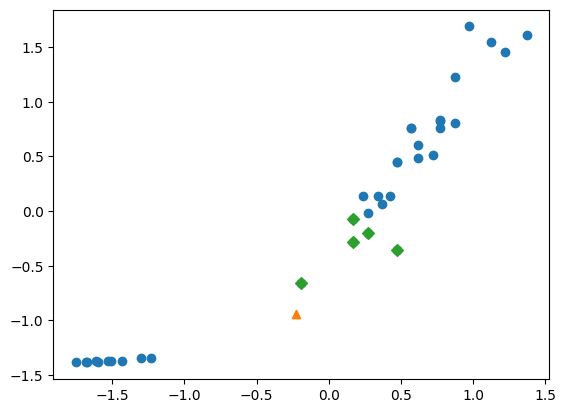

In [63]:
# prediction data 또한 normalization해준다 (방식은 동일하다)
# 시각화

new_data = ([25, 150] - mean) / std
print(knn.predict([new_data]))

distances, indexes = knn.kneighbors([new_data])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0], new_data[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')

plt.show()